#### Visualizaciones


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('DataScience_salaries_2024.csv')

¿Cómo han ido evolucionando los salarios de las empresas a lo largo de los años segun el tamaño de estas?

In [9]:
#cuando se usa el metodo plot, por defecto cada columna sera una grafica (cada columna es un y distinto: y1,y2,y3,...)
#y el indice del DataFrame es entendido como las coordenadas en el eje x, por ende construir una tabla de pivote
#facilita el trabajo al momento de comparar categorias, en este caso el tamaño de la empresa
df['salario_promedio_por_año_y_por_tamaño_de_la_empresa'] = df.groupby(['work_year', 'company_size'])['salary_in_usd'].transform('mean')
df.head()
tabla_pivote = pd.pivot_table(df,index='work_year',columns='company_size',values='salario_promedio_por_año_y_por_tamaño_de_la_empresa',aggfunc='first')
tabla_pivote 

company_size,L,M,S
work_year,,,
2020,114311.970588,113195.058824,77412.166667
2021,109559.298387,84363.326923,90732.523810
2022,124366.057292,137395.511694,87595.448980
2023,150082.367347,154436.924225,87784.258621
2024,156214.097902,151489.846555,78114.375000


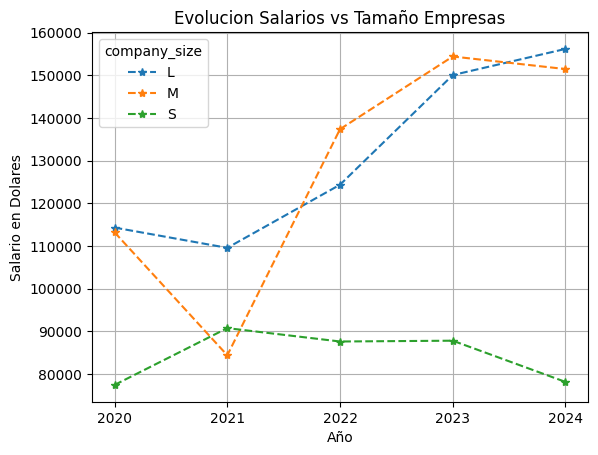

In [10]:
tabla_pivote.plot(
    title='Evolucion Salarios vs Tamaño Empresas', #titulo grafico
    xlabel='Año',                                  #etiqueta del eje x
    ylabel='Salario en Dolares',                   #etiqueta del eje y
    grid=True,                                     #mostrando cuadricula
    style='*--'                                    #linea segmentada (--) y dispercion con estrellas (*)
)
#se corrigen los valores mostrado en el eje x
lista_años = range(2020,2025)
plt.xticks(lista_años)
plt.show()

¿Cual es la diferencia entre el sueldo promedio de un experto en Brasil y Canada?

In [11]:
filtro = df['experience_level']=='EX'
seleccion = ['salary_in_usd']
agrupacion = ['employee_residence']
comparacion = df[filtro].groupby(agrupacion)[seleccion].mean().loc[['BR','CA']]
comparacion 

,salary_in_usd
employee_residence,
BR,112500.000000
CA,192426.538462


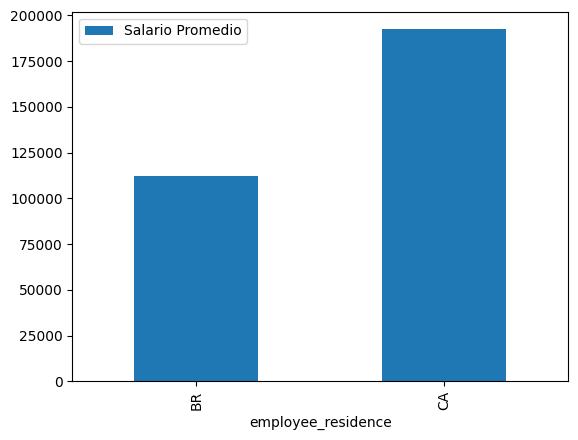

In [12]:
comparacion.plot(kind='bar')
plt.legend(['Salario Promedio'])

In [13]:
100 * abs(comparacion.loc['BR']-comparacion.loc['CA']) / comparacion.loc['BR']
# Un canadiense gana un 71% mas del sueldo de un brasileño


salary_in_usd    71.045812
dtype: float64

#### ¿Cuales son los 10 empleos mejor pagados?

<Axes: xlabel='job_title'>

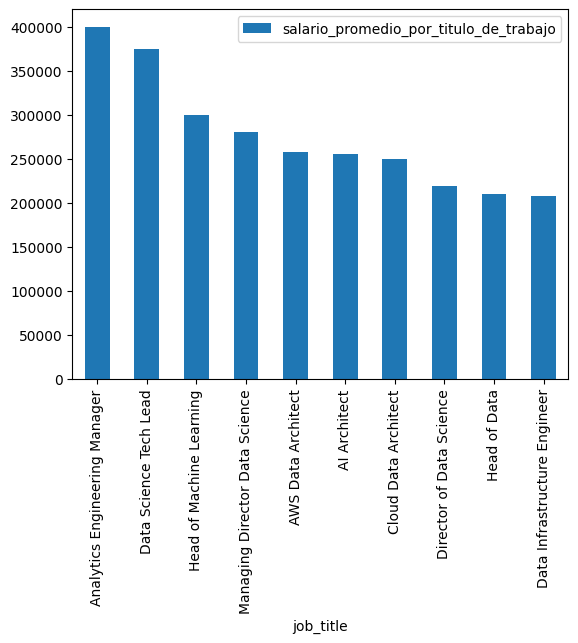

In [15]:
df['salario_promedio_por_titulo_de_trabajo'] = df.groupby('job_title')['salary_in_usd'].transform('mean')
tabla_ordenada = df.sort_values(by=['salario_promedio_por_titulo_de_trabajo'],ascending=False)
tabla_ordenada = tabla_ordenada.drop_duplicates(subset=['job_title','salario_promedio_por_titulo_de_trabajo'])
tabla_ordenada.head(10).plot(kind='bar',x='job_title',y='salario_promedio_por_titulo_de_trabajo')

¿Cómo es la distribucion de las diferencias salariales?

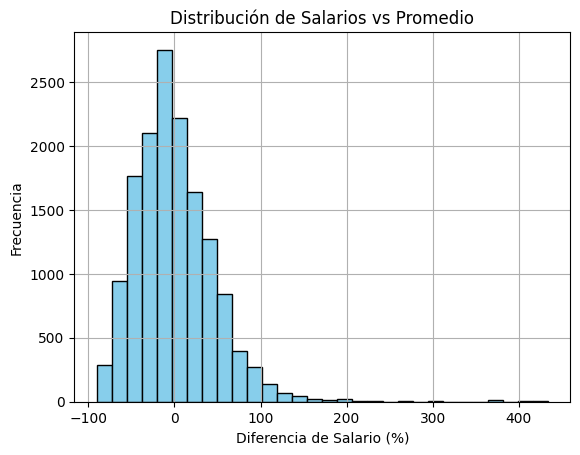

In [17]:
salario_promedio = df['salary_in_usd'].mean()
df['salario_vs_promedio'] = (df['salary_in_usd'] - salario_promedio) / salario_promedio * 100
df['salario_vs_promedio'] = df['salario_vs_promedio'].round(2)
plt.hist(df['salario_vs_promedio'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Salarios vs Promedio')
plt.xlabel('Diferencia de Salario (%)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()
#hay muchos empleados ganando más o menos que el promedio ?

#### ¿Cuales son los salarios promedio luego de ser ajustados segun experiencia?

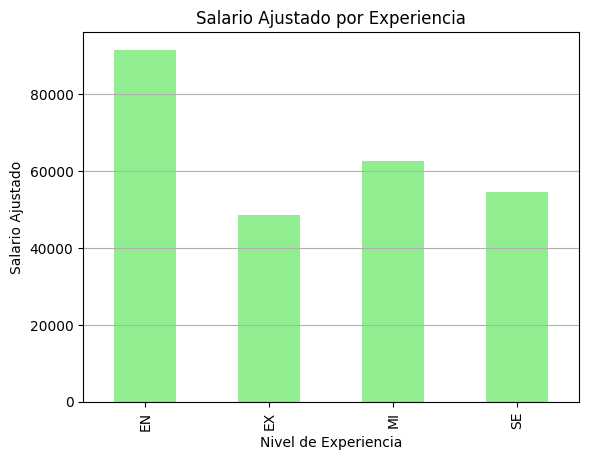

In [21]:
mapa_jerarquico = {
    'EN': 1,
    'MI': 2,
    'SE': 3,
    'EX': 4
}
df['jerarquia_experiencia'] = df['experience_level'].map(mapa_jerarquico)
df['salario_ajustado_por_experiencia'] = df['salary_in_usd'] / df['jerarquia_experiencia']
df['salario_ajustado_por_experiencia'] = df['salario_ajustado_por_experiencia'].round(2)
df.groupby('experience_level')['salario_ajustado_por_experiencia'].mean().plot(kind='bar', color='lightgreen')
plt.title('Salario Ajustado por Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario Ajustado')
plt.grid(axis='y')
plt.show()
#el salario ajustado aumenta de manera consistente con la experiencia?

#### Diferencias salariales segun ubicación de la empresa

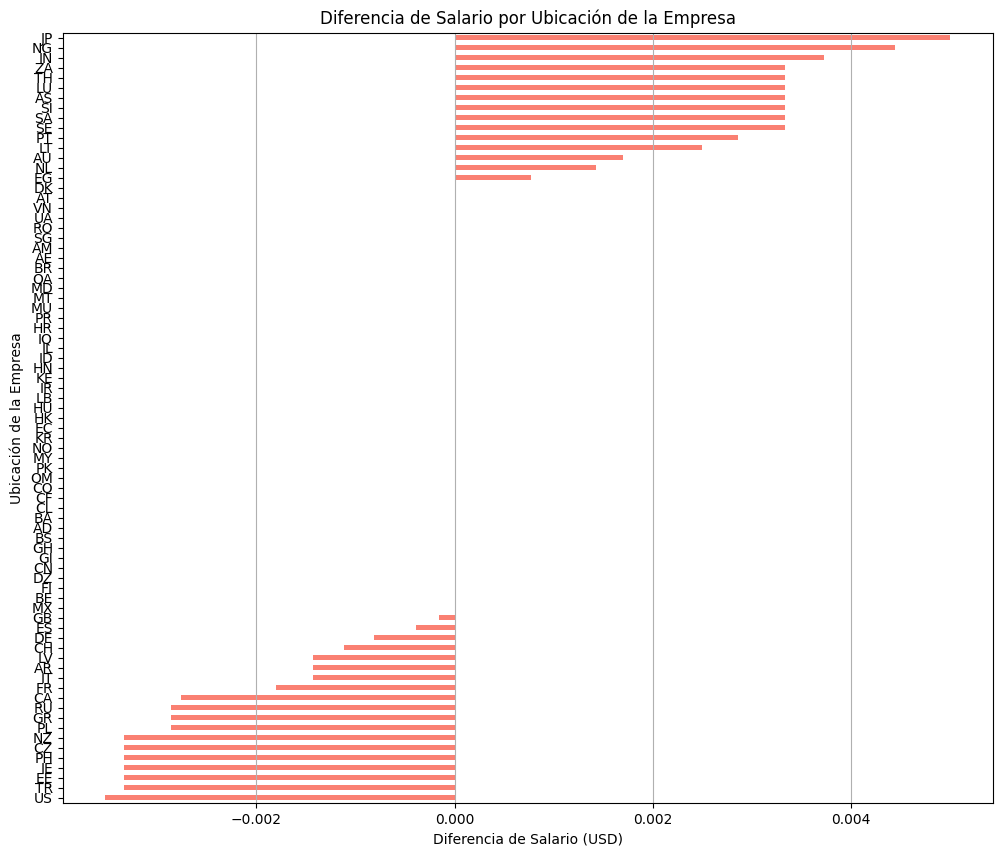

In [23]:

df['salario_promedio_por_locacion'] = df.groupby('company_location')['salary_in_usd'].transform('mean')
df['diferencia_salarial_por_ubicacion'] = df['salary_in_usd'] - df['salario_promedio_por_locacion']
df['diferencia_salarial_por_ubicacion'] = df['diferencia_salarial_por_ubicacion'].round(2)
plt.figure(figsize=(12, 10))
df.groupby('company_location')['diferencia_salarial_por_ubicacion'].mean().sort_values().plot(kind='barh', color='salmon')
plt.title('Diferencia de Salario por Ubicación de la Empresa')
plt.xlabel('Diferencia de Salario (USD)')
plt.ylabel('Ubicación de la Empresa')
plt.grid(axis='x')
plt.show()
#hay ubicaciones donde los salarios son más altos o más bajos en promedio?